In [28]:
import warnings
warnings.filterwarnings('ignore')
import json
from pprint import pprint

from datetime import timedelta, datetime

import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd

from os import path

import acquire

Using your store items data you acquired in lesson 1 exercises:

***1. Convert date column to datetime format.***

In [2]:
df = acquire.get_all_data()

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 913000 entries, 0 to 912999
Data columns (total 14 columns):
item_id          913000 non-null int64
sale_amount      913000 non-null float64
sale_date        913000 non-null object
sale_id          913000 non-null int64
store_id         913000 non-null int64
item_brand       913000 non-null object
item_name        913000 non-null object
item_price       913000 non-null float64
item_upc12       913000 non-null int64
item_upc14       913000 non-null int64
store_address    913000 non-null object
store_city       913000 non-null object
store_state      913000 non-null object
store_zipcode    913000 non-null int64
dtypes: float64(2), int64(6), object(6)
memory usage: 104.5+ MB


In [4]:
df['sale_date'] = pd.to_datetime(df['sale_date'])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 913000 entries, 0 to 912999
Data columns (total 14 columns):
item_id          913000 non-null int64
sale_amount      913000 non-null float64
sale_date        913000 non-null datetime64[ns, UTC]
sale_id          913000 non-null int64
store_id         913000 non-null int64
item_brand       913000 non-null object
item_name        913000 non-null object
item_price       913000 non-null float64
item_upc12       913000 non-null int64
item_upc14       913000 non-null int64
store_address    913000 non-null object
store_city       913000 non-null object
store_state      913000 non-null object
store_zipcode    913000 non-null int64
dtypes: datetime64[ns, UTC](1), float64(2), int64(6), object(5)
memory usage: 104.5+ MB


In [6]:
#sort df by `sale_date`
df.sort_values('sale_date',inplace = True)

***2. Plot the distribution of sale_amount, item_price, and sale_date***

In [7]:
# All of our sale_amount values are integers:
(df.sale_amount == df.sale_amount.astype(int)).sum(), (df.sale_amount == df.sale_amount.astype('int')).all()

(913000, True)

In [8]:
df.sale_amount = df.sale_amount.astype('int')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 913000 entries, 0 to 912999
Data columns (total 14 columns):
item_id          913000 non-null int64
sale_amount      913000 non-null int64
sale_date        913000 non-null datetime64[ns, UTC]
sale_id          913000 non-null int64
store_id         913000 non-null int64
item_brand       913000 non-null object
item_name        913000 non-null object
item_price       913000 non-null float64
item_upc12       913000 non-null int64
item_upc14       913000 non-null int64
store_address    913000 non-null object
store_city       913000 non-null object
store_state      913000 non-null object
store_zipcode    913000 non-null int64
dtypes: datetime64[ns, UTC](1), float64(1), int64(7), object(5)
memory usage: 104.5+ MB


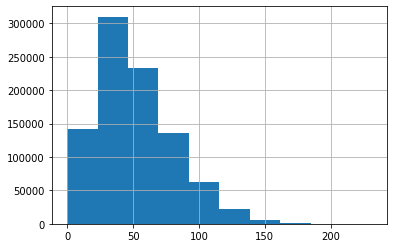

In [10]:
df.sale_amount.hist()

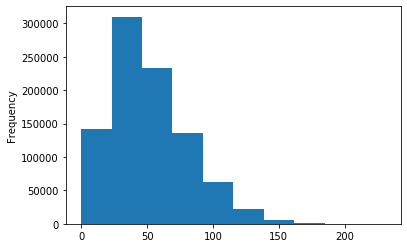

In [11]:
#another way to plot hist of a feature.
df.sale_amount.plot.hist()

In [12]:
df.item_price.value_counts(bins=10).sort_index()

(0.59, 1.504]     109560
(1.504, 2.408]     54780
(2.408, 3.312]    109560
(3.312, 4.216]     91300
(4.216, 5.12]      54780
(5.12, 6.024]     127820
(6.024, 6.928]     54780
(6.928, 7.832]    109560
(7.832, 8.736]    109560
(8.736, 9.64]      91300
Name: item_price, dtype: int64

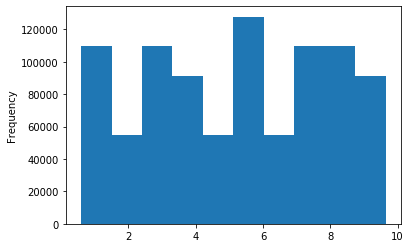

In [13]:
df.item_price.plot.hist()

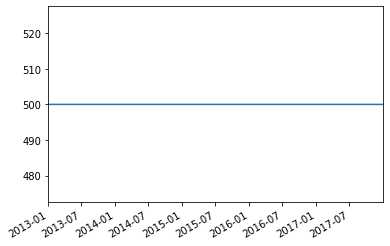

In [14]:
df.sale_date.value_counts().plot()

***Takeaway*** Each date had 500 items sold.

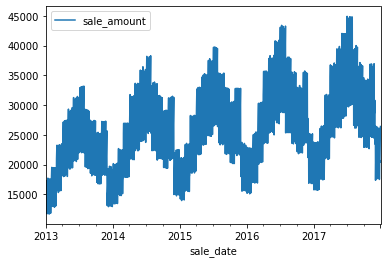

In [15]:
df[['sale_date','sale_amount']].groupby('sale_date').sum().plot()

***3. Set the index to be the datetime variable***

In [16]:
by_date = df.set_index('sale_date')
by_date.head()

,item_id,sale_amount,sale_id,store_id,item_brand,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_state,store_zipcode
sale_date,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,1,13,1,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253
2013-01-01 00:00:00+00:00,17,26,295813,3,Ducal,Ducal Refried Red Beans,1.16,88313590791,88313590791,2118 Fredericksburg Rdj,San Antonio,TX,78201
2013-01-01 00:00:00+00:00,7,32,125995,10,Twinings Of London,Twinings Of London Classics Lady Grey Tea - 20 Ct,9.64,70177154004,70177154004,8503 NW Military Hwy,San Antonio,TX,78231
2013-01-01 00:00:00+00:00,18,45,314073,3,Scotch,Scotch Removable Clear Mounting Squares - 35 Ct,4.39,21200725340,21200725340,2118 Fredericksburg Rdj,San Antonio,TX,78201
2013-01-01 00:00:00+00:00,19,34,332333,3,Careone,Careone Family Comb Set - 8 Ct,0.74,41520035646,41520035646,2118 Fredericksburg Rdj,San Antonio,TX,78201


In [17]:
by_date['month'] = list(by_date.index.month)


In [18]:
by_date['namedayofweek'] = list(by_date.index.weekday_name)

In [19]:
by_date['dayofweek']=list(by_date.index.dayofweek)

In [20]:
by_date.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 913000 entries, 2013-01-01 00:00:00+00:00 to 2017-12-31 00:00:00+00:00
Data columns (total 16 columns):
item_id          913000 non-null int64
sale_amount      913000 non-null int64
sale_id          913000 non-null int64
store_id         913000 non-null int64
item_brand       913000 non-null object
item_name        913000 non-null object
item_price       913000 non-null float64
item_upc12       913000 non-null int64
item_upc14       913000 non-null int64
store_address    913000 non-null object
store_city       913000 non-null object
store_state      913000 non-null object
store_zipcode    913000 non-null int64
month            913000 non-null int64
namedayofweek    913000 non-null object
dayofweek        913000 non-null int64
dtypes: float64(1), int64(9), object(6)
memory usage: 138.4+ MB


***5. Add a column to your dataframe, sales_total, which is derived from sale_amount(total items) and item_price.***

In [21]:
by_date['sales_total'] = by_date['sale_amount']*by_date['item_price']

In [22]:
by_date.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 913000 entries, 2013-01-01 00:00:00+00:00 to 2017-12-31 00:00:00+00:00
Data columns (total 17 columns):
item_id          913000 non-null int64
sale_amount      913000 non-null int64
sale_id          913000 non-null int64
store_id         913000 non-null int64
item_brand       913000 non-null object
item_name        913000 non-null object
item_price       913000 non-null float64
item_upc12       913000 non-null int64
item_upc14       913000 non-null int64
store_address    913000 non-null object
store_city       913000 non-null object
store_state      913000 non-null object
store_zipcode    913000 non-null int64
month            913000 non-null int64
namedayofweek    913000 non-null object
dayofweek        913000 non-null int64
sales_total      913000 non-null float64
dtypes: float64(2), int64(9), object(6)
memory usage: 145.4+ MB


***6. Using pandas.DataFrame.diff() function, create a new column that is the result of the current sales - the previous days sales.***

In [30]:
by_date[['sales_total']].resample('D').sum().diff()

,sales_total
sale_date,
2013-01-01 00:00:00+00:00,NaN
2013-01-02 00:00:00+00:00,-273.43
2013-01-03 00:00:00+00:00,4598.90
2013-01-04 00:00:00+00:00,6298.25
2013-01-05 00:00:00+00:00,3154.12
2013-01-06 00:00:00+00:00,5472.00
2013-01-07 00:00:00+00:00,-29316.31
2013-01-08 00:00:00+00:00,9217.12
2013-01-09 00:00:00+00:00,2139.26


***7. Make sure all the work that you have done above is reproducible. That is, you should pul the code above into separate functions and be able to re-run the functions and get the same results.***

Using the OPS data acquired in lesson 1 exercises:

***1. Convert date column to datetimeformat.***

In [74]:
df = acquire.get_power_data()

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4383 entries, 0 to 4382
Data columns (total 5 columns):
Date           4383 non-null object
Consumption    4383 non-null float64
Wind           2920 non-null float64
Solar          2188 non-null float64
Wind+Solar     2187 non-null float64
dtypes: float64(4), object(1)
memory usage: 171.3+ KB


In [76]:
df.head()

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN
3,2006-01-04,1457.217,NaN,NaN,NaN
4,2006-01-05,1477.131,NaN,NaN,NaN


In [77]:
df.rename(columns = {'Wind+Solar': 'Wind_Solar'},inplace = True)
df.head() 

,Date,Consumption,Wind,Solar,Wind_Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN
3,2006-01-04,1457.217,NaN,NaN,NaN
4,2006-01-05,1477.131,NaN,NaN,NaN


In [78]:
df['Date'] = pd.to_datetime(df['Date'])

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4383 entries, 0 to 4382
Data columns (total 5 columns):
Date           4383 non-null datetime64[ns]
Consumption    4383 non-null float64
Wind           2920 non-null float64
Solar          2188 non-null float64
Wind_Solar     2187 non-null float64
dtypes: datetime64[ns](1), float64(4)
memory usage: 171.3 KB


***2. Plot  the distribution of each of your variables***

In [80]:
df.sort_values('Date',inplace = True)

In [81]:
by_date = df.groupby(['Date'])['Consumption'].sum().reset_index()

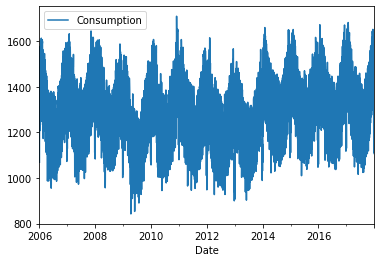

In [82]:
by_date.plot(x='Date', y='Consumption')

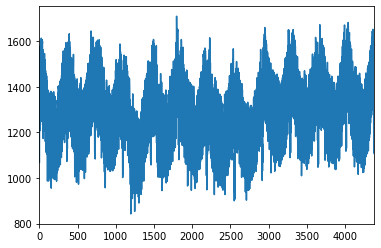

In [83]:
df.Consumption.plot()

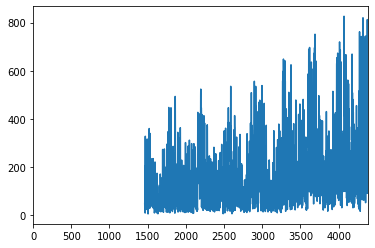

In [84]:
df.Wind.plot()

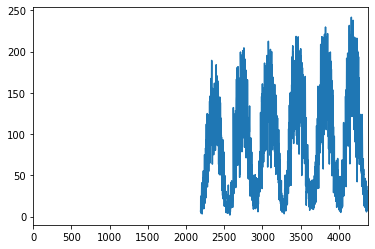

In [85]:
df.Solar.plot()

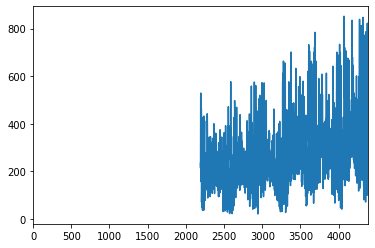

In [86]:
df.Wind_Solar.plot()

***3. Set the index to be the datetime variable.***

In [89]:
df.set_index('Date',inplace=True)

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4383 entries, 2006-01-01 to 2017-12-31
Data columns (total 4 columns):
Consumption    4383 non-null float64
Wind           2920 non-null float64
Solar          2188 non-null float64
Wind_Solar     2187 non-null float64
dtypes: float64(4)
memory usage: 171.2 KB


In [91]:
df.index.nunique()

4383

In [92]:
df.index.min()

Timestamp('2006-01-01 00:00:00')

In [93]:
df.index.max()

Timestamp('2017-12-31 00:00:00')

In [94]:
timedelta(df.index.nunique())

datetime.timedelta(days=4383)

***4. Add a month and a year column to your dataframe.***

In [98]:
df['month'] = list(df.index.month)

In [99]:
df['year'] = list(df.index.year)

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4383 entries, 2006-01-01 to 2017-12-31
Data columns (total 6 columns):
Consumption    4383 non-null float64
Wind           2920 non-null float64
Solar          2188 non-null float64
Wind_Solar     2187 non-null float64
month          4383 non-null int64
year           4383 non-null int64
dtypes: float64(4), int64(2)
memory usage: 239.7 KB


***5. Make sure all the work that you have done above is reproduciple. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.***